 **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

**Load the dataset**

In [2]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\Project\\CODE TEC INTERNSHIP\\MACHINE LEARNING  task\\loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
data.shape

(4269, 13)

In [7]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


**Data Preprocessing**

In [9]:
for col in [' education', ' self_employed', ' loan_status']:#checking unique values
    print(f"Unique values in column '{col}':")
    print(data[col].unique())
    print("\n")

Unique values in column ' education':
[' Graduate' ' Not Graduate']


Unique values in column ' self_employed':
[' No' ' Yes']


Unique values in column ' loan_status':
[' Approved' ' Rejected']




**checking Missing Values.**

In [10]:
data.isna().any()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

**droping duplicates**

In [11]:
data1=data.drop_duplicates()

In [12]:
data1.shape

(4269, 13)

**delete space in the column names**

In [13]:
data1.columns = data.columns.str.strip()
data1.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

**encoding categorical into numerical**

In [14]:
encoders = {
    'education': LabelEncoder(),
    'self_employed': LabelEncoder(),
    'loan_status' : LabelEncoder()
}

# Fit the encoders with the respective columns
encoders['education'].fit(data1['education'])
encoders['self_employed'].fit(data1['self_employed'])
encoders['loan_status'].fit(data1['loan_status'])

LabelEncoder()

In [15]:
# Transform categorical columns using encoders
data1['education'] = encoders['education'].transform(data1['education'])
data1['self_employed'] = encoders['self_employed'].transform(data1['self_employed'])
data1['loan_status'] = encoders['loan_status'].transform(data1['loan_status'])

**Removing Outliers**

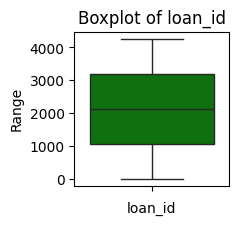

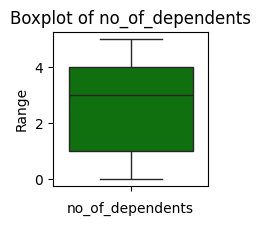

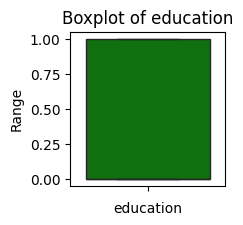

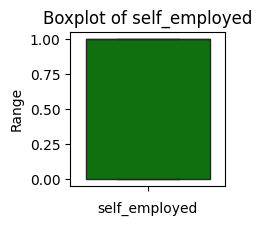

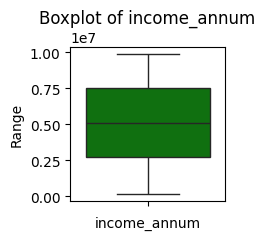

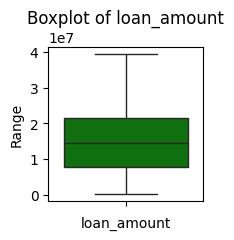

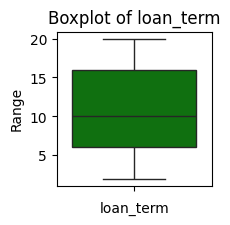

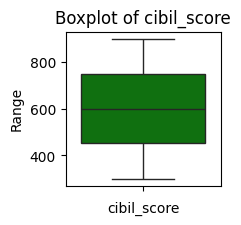

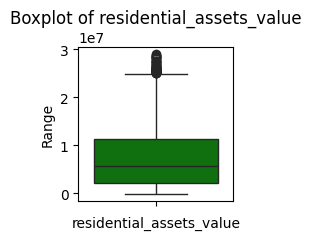

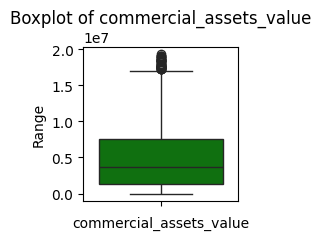

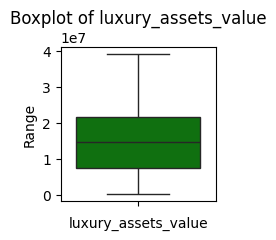

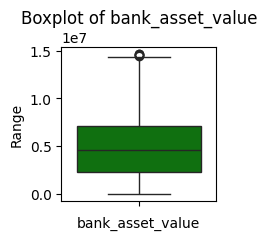

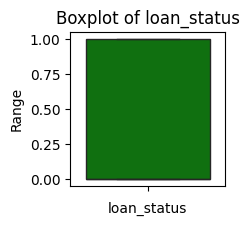

In [16]:
for col in data1.columns:  
    plt.figure(figsize=(2, 2))
    sns.boxplot(y=data1[col], color='green')  # Using y=df[col] for a vertical boxplot
    plt.xlabel(col)
    plt.ylabel('Range')
    plt.title(f"Boxplot of {col}")  # Add a title for clarity
    plt.show()

In [17]:
def iqr_method(df, variables):
    lower_bounds = {}
    upper_bounds = {}
    
    for var in variables:  # Loop through each column
        q1 = df[var].quantile(0.25)
        q3 = df[var].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + (1.5 * iqr)
        lower = q1 - (1.5 * iqr)
        
        lower_bounds[var] = lower
        upper_bounds[var] = upper

    return lower_bounds, upper_bounds


In [18]:
import numpy as np

# Assuming colms is a list of column names
colms = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']  # Example column names

for i in colms:  # Loop through each column name
    print(f"Processing Column: {i}")
    
    # Get IQR limits
    lower_lim, upper_lim = iqr_method(data1, [i])  # Pass as a list to match function format
    lower_lim, upper_lim = lower_lim[i], upper_lim[i]  # Extract values for the column
    
    print(f'Lower Limit for {i} = {lower_lim}')
    print(f'Upper Limit for {i} = {upper_lim}')
    
    # Apply capping to remove outliers
    data1[i] = np.where(data1[i] > upper_lim, upper_lim, 
                     np.where(data1[i] < lower_lim, lower_lim, data1[i]))  # Corrected brackets

print("Outliers handled using IQR method.")


Processing Column: residential_assets_value
Lower Limit for residential_assets_value = -11450000.0
Upper Limit for residential_assets_value = 24950000.0
Processing Column: commercial_assets_value
Lower Limit for commercial_assets_value = -8150000.0
Upper Limit for commercial_assets_value = 17050000.0
Processing Column: bank_asset_value
Lower Limit for bank_asset_value = -4900000.0
Upper Limit for bank_asset_value = 14300000.0
Outliers handled using IQR method.


**correlation**

In [19]:
corr=data1.corr()["loan_status"].sort_values(ascending=False)
corr

loan_status                 1.000000
loan_term                   0.113036
no_of_dependents            0.018114
luxury_assets_value         0.015465
income_annum                0.015189
residential_assets_value    0.014985
bank_asset_value            0.006746
education                   0.004918
self_employed              -0.000345
commercial_assets_value    -0.008799
loan_amount                -0.016150
loan_id                    -0.017685
cibil_score                -0.770518
Name: loan_status, dtype: float64

**drop columns with low correlation to the target**


In [20]:
data1 = data1.drop(columns=["education","self_employed","loan_id","commercial_assets_value","bank_asset_value"])
data1

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value,loan_status
0,2,9600000,29900000,12,778,2400000.0,22700000,0
1,0,4100000,12200000,8,417,2700000.0,8800000,1
2,3,9100000,29700000,20,506,7100000.0,33300000,1
3,3,8200000,30700000,8,467,18200000.0,23300000,1
4,5,9800000,24200000,20,382,12400000.0,29400000,1
...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000.0,3300000,1
4265,0,3300000,11300000,20,559,4200000.0,11000000,0
4266,2,6500000,23900000,18,457,1200000.0,18100000,1
4267,1,4100000,12800000,8,780,8200000.0,14100000,0


**Define features (X) and target (y)**

In [21]:
x=data1.drop(["loan_status"],axis=1)
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,luxury_assets_value
0,2,9600000,29900000,12,778,2400000.0,22700000
1,0,4100000,12200000,8,417,2700000.0,8800000
2,3,9100000,29700000,20,506,7100000.0,33300000
3,3,8200000,30700000,8,467,18200000.0,23300000
4,5,9800000,24200000,20,382,12400000.0,29400000
...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000.0,3300000
4265,0,3300000,11300000,20,559,4200000.0,11000000
4266,2,6500000,23900000,18,457,1200000.0,18100000
4267,1,4100000,12800000,8,780,8200000.0,14100000


In [22]:
y=data1["loan_status"]
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int32

In [23]:
print(x.shape)
print(y.shape)

(4269, 7)
(4269,)


**Train-test split**

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
 1675                 5       7900000     29900000          6          568   
 1164                 0       9600000     34000000         12          710   
 192                  1        800000      2900000          8          682   
 910                  2       4900000     13100000         18          754   
 567                  5       3000000     11100000         12          441   
 ...                ...           ...          ...        ...          ...   
 3444                 0       1300000      4700000         16          530   
 466                  5        500000      1800000         18          411   
 3092                 4       8600000     20600000         16          449   
 3772                 2       7000000     21400000         12          541   
 860                  4       6200000     17300000          6          837   
 
       residential_assets_value  luxury_assets_value  
 1675  

**Scale the features**

In [25]:
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_train

array([[ 1.51250774,  1.00950021,  1.62477248, ..., -0.18740061,
        -0.25452551,  0.07808278],
       [-1.43500078,  1.61417128,  2.07712843, ...,  0.63739678,
         2.52204249,  2.49843196],
       [-0.84549907, -1.51589075, -1.35415691, ...,  0.47476068,
        -0.80983911, -1.33923881],
       ...,
       [ 0.92300603,  1.25848241,  0.5986968 , ..., -0.87860405,
         0.51674338,  1.47359943],
       [-0.25599737,  0.68938023,  0.68696138, ..., -0.34422828,
        -0.57845844,  0.50327926],
       [ 0.92300603,  0.40482913,  0.23460543, ...,  1.37506769,
         0.79440018,  1.03750048]])

In [26]:
x_test=sd.fit_transform(x_test)
x_test

array([[ 1.34468623,  0.12622852,  0.52790376, ..., -1.0129156 ,
        -0.15399666,  0.09116237],
       [-0.45337542,  0.30565455, -0.10864068, ...,  0.00215435,
        -0.43855449,  0.32938266],
       [ 0.14597846,  1.63340716,  0.55023865, ..., -0.84565975,
        -0.51759833,  1.54317176],
       ...,
       [ 1.34468623,  0.19799893, -0.38782685, ...,  0.55582887,
         0.3202664 , -0.36259057],
       [ 0.74533235, -1.02209806, -0.71168279, ..., -1.30128774,
        -0.5334071 , -1.02053232],
       [-1.05272931, -0.77090162, -0.67818045, ..., -0.43617131,
        -1.03928769, -0.58946704]])

**Balancing the dataset**

In [27]:
y_train.value_counts()

loan_status
0    2120
1    1295
Name: count, dtype: int64

In [28]:
sm = SMOTE(random_state=42)
x_train1,y_train1=sm.fit_resample(x_train,y_train)

In [29]:
y_train1.value_counts()

loan_status
0    2120
1    2120
Name: count, dtype: int64

**Model implementing and Hyperparameter Tuning**

In [30]:
models = {
    'Random Forest': RandomForestClassifier(max_depth=6,min_samples_leaf=2,min_samples_split=5,n_estimators=100,max_features="sqrt",random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500),
}

**Train and evaluate each model**


--- Random Forest Results ---
 Training Accuracy: 0.9790
 Testing Accuracy: 0.9532
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       536
           1       0.91      0.97      0.94       318

    accuracy                           0.95       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.95      0.95       854



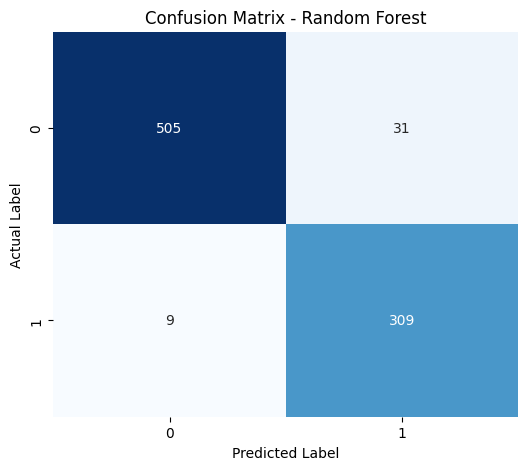


--- Logistic Regression Results ---
 Training Accuracy: 0.9318
 Testing Accuracy: 0.9087
 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       536
           1       0.85      0.91      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854



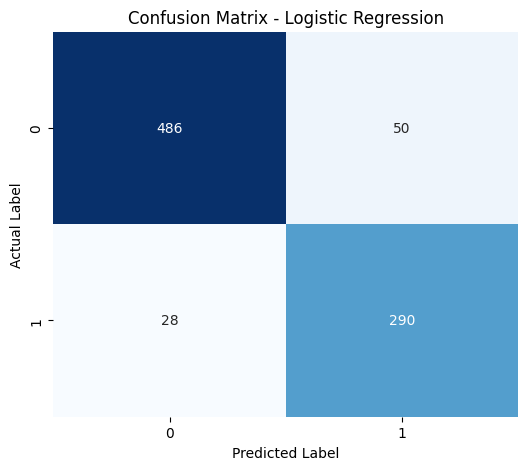

In [31]:
for model_name, model in models.items():
    # Train the model
    model.fit(x_train1, y_train1)

    # Make predictions on train and test sets
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test)

    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train1, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # classification report
    report = classification_report(y_test, y_test_pred)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f" Training Accuracy: {train_accuracy:.4f}")
    print(f" Testing Accuracy: {test_accuracy:.4f}")
    print(" Classification Report:")
    print(report)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


**get feature importance of each model**


Training Random Forest...


Feature Importance (Tree-Based) for Random Forest:
                     Feature  Importance
4               cibil_score    0.887940
3                 loan_term    0.062752
2               loan_amount    0.017355
6       luxury_assets_value    0.011317
1              income_annum    0.009086
5  residential_assets_value    0.007798
0          no_of_dependents    0.003752


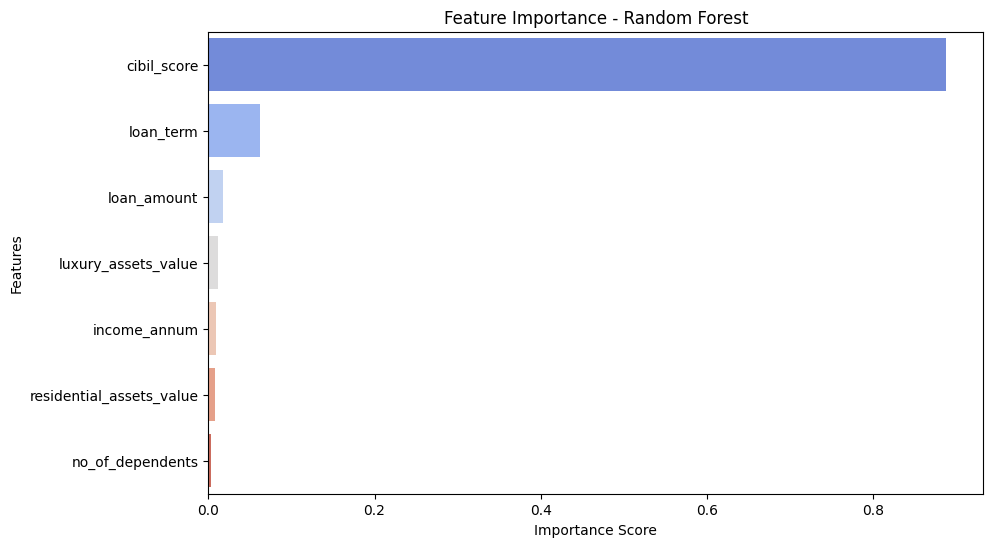


Training Logistic Regression...


Feature Importance (Coefficient-Based) for Logistic Regression:
                     Feature    Importance
3                 loan_term  1.954316e-01
0          no_of_dependents  3.372116e-02
4               cibil_score  7.771572e-03
1              income_annum  4.922484e-07
2               loan_amount  6.693096e-08
6       luxury_assets_value  1.690973e-08
5  residential_assets_value  4.589586e-09


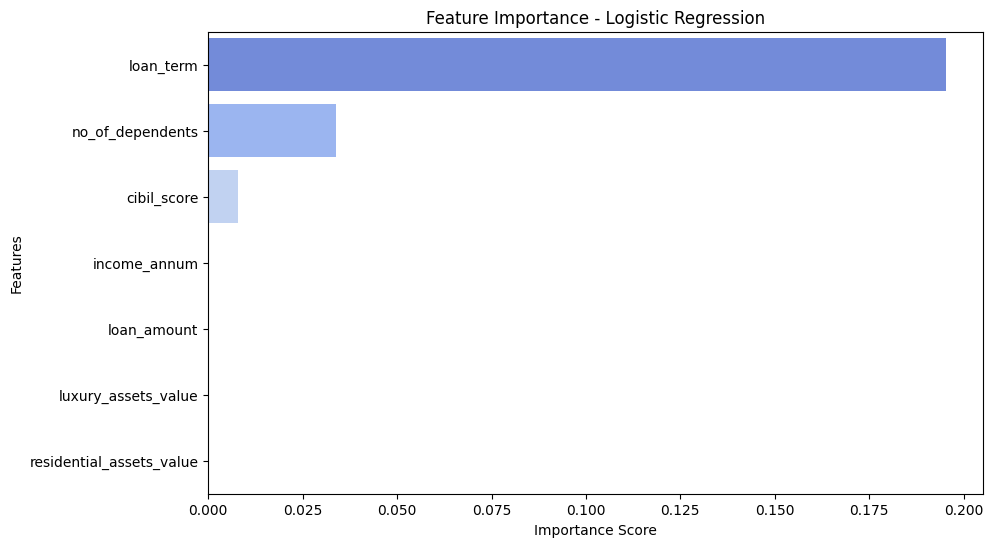

In [32]:
# Train and display feature importance
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    model.fit(x, y)

    # Get feature importance
    if hasattr(model, "feature_importances_"):  # Tree-based models
        importance = model.feature_importances_
        importance_type = "Feature Importance (Tree-Based)"
    
    if hasattr(model, "coef_"):  # Linear models
        importance = np.abs(model.coef_[0])  # Taking absolute values
        importance_type = "Feature Importance (Coefficient-Based)"
    
    # Create DataFrame
    feature_importance = pd.DataFrame({
        'Feature': x.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    print(f"\n{importance_type} for {name}:\n", feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(
    x=feature_importance["Importance"], 
    y=feature_importance["Feature"], 
    hue=feature_importance["Feature"],  # Fix for Seaborn v0.14+
    palette="coolwarm", 
    legend=False  # Prevent unnecessary legends
    )
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title(f"Feature Importance - {name}")
    plt.show()


**Save the trained models**

In [33]:
joblib.dump(models['Logistic Regression'], 'logistic_model.pkl')
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(sd, "scaler.pkl")

['scaler.pkl']